<a href="https://colab.research.google.com/github/bvo4/Project-2/blob/main/bvo4_decision_tree_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install anvil-uplink

In [ ]:
import sklearn
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/bvo4/TEMP/main/data_upload.csv', on_bad_lines='skip')
print (data)

labels = ['Triple DES', 'AES', 'IDEA', 'SIMON', 'Threefish']
features = ['Age', 'Memory', 'Constraint', 'Security', 'Simple', 'Usage']

unique_values = {
    'Age': ['old', 'new'],
    'Memory': ['yes', 'no'],
    'Constraint':['yes', 'no'],
    'Security': ['Security', 'Speed'],
    'Simple': ['Simple', 'Complex'],
    'Usage': ['Yes', 'No']
}

#print(data.head())
print(data)

    Age Memory Constraint  Security   Simple Usage      Scheme
0   Yes     No         No  Security   Simple   Yes  Triple DES
1   Yes     No        Yes  Security   Simple   Yes  Triple DES
2   Yes    Yes        Yes  Security   Simple   Yes  Triple DES
3   Yes    Yes        Yes     Speed   Simple    No         AES
4   Yes    Yes         No     Speed   Simple   Yes         AES
5   Yes     No         No     Speed   Simple    No         AES
6   Yes    Yes        Yes  Security   Simple   Yes         AES
7   Yes    Yes         No  Security   Simple   Yes         AES
8   Yes     No         No  Security   Simple    No         AES
9    No    Yes        Yes  Security  Complex    No        IDEA
10   No     No        Yes  Security  Complex   Yes        IDEA
11   No    Yes        Yes  Security  Complex   Yes        IDEA
12   No     No        Yes  Security  Complex   Yes        IDEA
13   No     No        Yes  Security  Complex    No        IDEA
14   No    Yes        Yes  Security   Simple    No     

In [ ]:
X_train = data[features]
Y_TRAIN = data['Scheme']

In [ ]:
from dataclasses import dataclass
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

def encode_data(data):
  le = preprocessing.LabelEncoder()
  data = data.apply(le.fit_transform)
  return data

# Function to split the dataset
def splitdataset(data):
  
    # Separating the target variable
    X = data.values[:, 0:6]
    Y = data.values[:, 6]
  
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.3, random_state = 100)
    return X, Y, X_train, X_test, y_train, y_test

data = encode_data(data)

X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
splitdataset(data)

scheme_mapping = {'3DES': 1, 'AES': 2, 'IDEA': 3, 'Simon': 4,'ThreefishB': 5}

print(y_train)

[3 0 3 4 4 1 2 2 0 4 1 2 2 0 0 0]


In [ ]:
from sklearn import tree
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

[Text(0.5555555555555556, 0.9166666666666666, 'Age <= 0.5\ngini = 0.773\nsamples = 16\nvalue = [5, 2, 4, 2, 3]\nclass = Triple DES'),
 Text(0.3333333333333333, 0.75, 'Simple <= 0.5\ngini = 0.625\nsamples = 8\nvalue = [0, 2, 4, 2, 0]\nclass = IDEA'),
 Text(0.2222222222222222, 0.5833333333333334, 'Security <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 0, 2, 0]\nclass = AES'),
 Text(0.1111111111111111, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0]\nclass = AES'),
 Text(0.3333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0]\nclass = SIMON'),
 Text(0.4444444444444444, 0.5833333333333334, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4, 0, 0]\nclass = IDEA'),
 Text(0.7777777777777778, 0.75, 'Security <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 0, 0, 0, 3]\nclass = Triple DES'),
 Text(0.6666666666666666, 0.5833333333333334, 'Constraint <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [2, 0, 0, 0, 3]\nclass = Threefish'),
 Text(0.555555555555

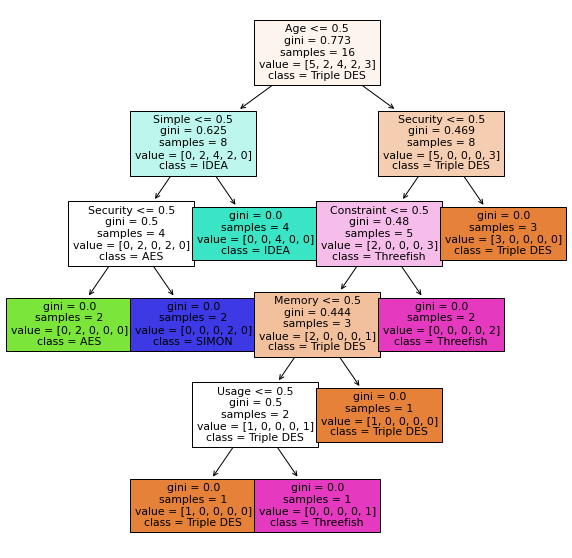

In [ ]:
from matplotlib import pyplot as plt
fix, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf, feature_names=features, class_names=labels, ax=ax, filled=True)

In [ ]:
import anvil.server

anvil.server.connect("NNAOYGE3VS22G3O4NAXBSDON-PGO42YOCZH2TKJSD")

@anvil.server.callable
def test(name):
  return("Hello from the uplink, %s!" % name)

@anvil.server.callable
def import_data():
  data = pd.read_csv('https://raw.githubusercontent.com/bvo4/TEMP/main/data_upload.csv', on_bad_lines='skip')
  print (data)

  labels = ['Triple DES', 'AES', 'IDEA', 'SIMON', 'Threefish']
  features = ['Age', 'Memory', 'Constraint', 'Security', 'Simple', 'Usage']

  unique_values = {
      'Age': ['old', 'new'],
      'Memory': ['yes', 'no'],
      'Constraint':['yes', 'no'],
      'Security': ['Security', 'Speed'],
      'Simple': ['Simple', 'Complex'],
      'Usage': ['Yes', 'No']
  }
  return str(data)

anvil.server.wait_forever()

    Age Memory Constraint  Security   Simple Usage      Scheme
0   Yes     No         No  Security   Simple   Yes  Triple DES
1   Yes     No        Yes  Security   Simple   Yes  Triple DES
2   Yes    Yes        Yes  Security   Simple   Yes  Triple DES
3   Yes    Yes        Yes     Speed   Simple    No         AES
4   Yes    Yes         No     Speed   Simple   Yes         AES
5   Yes     No         No     Speed   Simple    No         AES
6   Yes    Yes        Yes  Security   Simple   Yes         AES
7   Yes    Yes         No  Security   Simple   Yes         AES
8   Yes     No         No  Security   Simple    No         AES
9    No    Yes        Yes  Security  Complex    No        IDEA
10   No     No        Yes  Security  Complex   Yes        IDEA
11   No    Yes        Yes  Security  Complex   Yes        IDEA
12   No     No        Yes  Security  Complex   Yes        IDEA
13   No     No        Yes  Security  Complex    No        IDEA
14   No    Yes        Yes  Security   Simple    No     

KeyboardInterrupt: ignored

In [ ]:
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))

cal_accuracy(X_train, y_train)

NameError: ignored

In [ ]:
import anvil.server
@anvil.server.callable
def interface(response):
  tree = clf.tree_
  node = 0      #Index of root node
  while True:
      feat,thres = tree.feature[node],tree.threshold[node]
      print(feat,thres)
      v = float(input(f"Age rating:  1 = Yes.  0 = New: "))
      if v<=thres:
          node = tree.children_left[node]
      else:
          node = tree.children_right[node]
      if tree.children_left[node] == tree.children_right[node]: #Check for leaf
          label = np.argmax(tree.value[node])
          print("We've reached a leaf node")
          print(f"Predicted Label is: {data['Scheme'][label]}")
          break

@anvil.server.callable
def translate(input):
  if input == 0:
    return "Triple DES"
  if input == 1:
      return "AES"
  if input == 2:
      return "IDEA"
  if input == 3:
      return "SIMON"
  if input == 4:
      return "Threefish-1024"

@anvil.server.callable
def question_1():
  question_1 = "Do you prefer an old and proven scheme over a new and experimental one?"
@anvil.server.callable
def question_2(): 
  return "Do you want a scheme that is widely and publicly available or do you want a scheme that is not widely supported but more challenging to understand?"
@anvil.server.callable
def question_3():
  return "Are you encrypting on a resource-constrained device?"
@anvil.server.callable
def question_4():
  return "Do you value security over speed?"
@anvil.server.callable
def question_5():
  return "Do you prefer simplicity over complexity?"
@anvil.server.callable
def question_6():
  return "Are you fine with high memory usage?"